 ### Loan Approval Classification Dataset Overview
This dataset offers an overview of loan applications along with attributes that contribute to assessing loan approval or rejection. The data includes both applicant-specific and loan-specific features that can help model the probability of loan approval.


| Column | Description | Type |
| :--- | :--- | :--- |
| `person_age` | Age of the person | Float |
| `person_gender` | Gender of the person | Categorical |
| `person_education` | Highest education level | Categorical |
| `person_income` | Annual income | Float |
| `person_emp_exp` | Years of employment experience | Integer |
| `person_home_ownership` | Home ownership status (e.g., rent, own, mortgage) | Categorical |
| `loan_amnt` | Loan amount requested | Float |
| `loan_intent` | Purpose of the loan | Categorical |
| `loan_int_rate` | Loan interest rate | Float |
| `loan_percent_income` | Loan amount as a percentage of annual income | Float |
| `cb_person_cred_hist_length` | Length of credit history in years | Float |
| `credit_score` | Credit score of the person | Integer |
| `previous_loan_defaults_on_file` | Indicator of previous loan defaults | Categorical |
| **`loan_status`** | **Target variable:** Loan approval status (1=approved, 0=rejected) | Integer |

### 1. Imports

In [1]:
import pandas as pd 
import seaborn as sns
import math
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data/loan_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [3]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [4]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


Taking a quick summary of the dataset:

Data contains 45000 rows and 14 columns with no NULL values

There are a few outliers in the numeric columns. For example, the maximum of person_age is 144 and person_emp_exp is 125. 

### 2. EDA

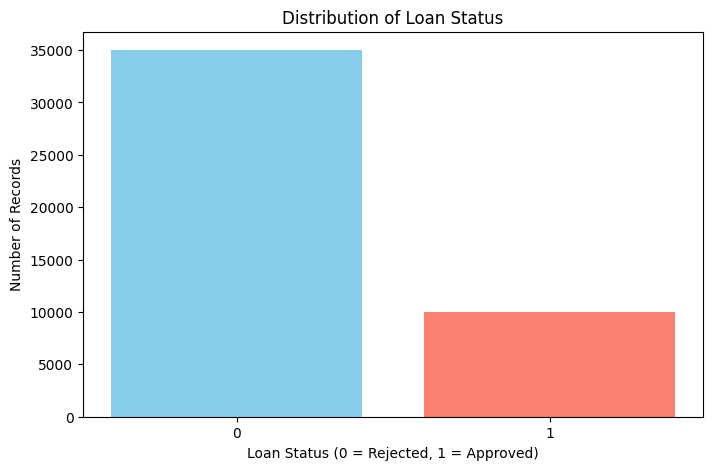

In [5]:
counts = df['loan_status'].value_counts()

plt.figure(figsize=(8, 5))
plt.bar(counts.index.astype(str), counts.values, color=['skyblue', 'salmon'])

# labels and title
plt.xlabel('Loan Status (0 = Rejected, 1 = Approved)')
plt.ylabel('Number of Records')
plt.title('Distribution of Loan Status')

plt.show()

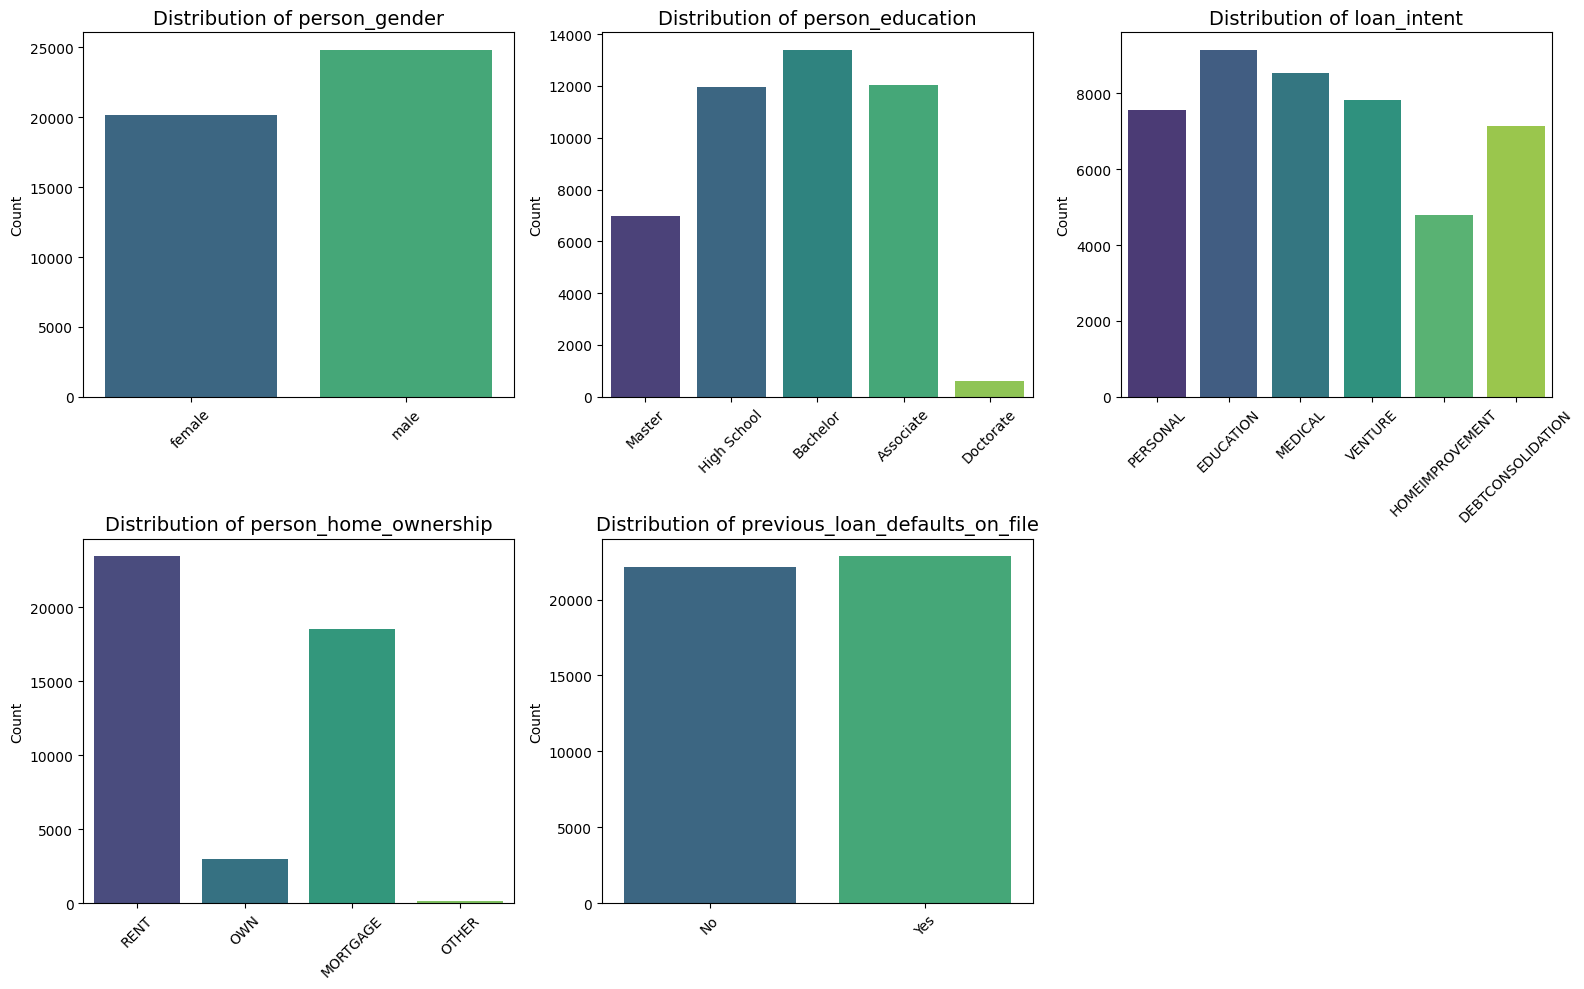

In [6]:
# 1. Define the specific categorical columns
cat_cols = [
    'person_gender', 
    'person_education', 
    'loan_intent', 
    'person_home_ownership', 
    'previous_loan_defaults_on_file'
]

# Grid for display of charts (3 columns wide)
n_cols = 3
n_rows = math.ceil(len(cat_cols) / n_cols)

# Defining figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 5))
axes = axes.flatten() # Convert the 2D grid into a 1D list for easy looping

# 4. Loop through and plot
for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, ax=axes[i], palette='viridis', hue=col, legend=False)
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    
    # Rotate labels to prevent overlap (especially important for education and intent)
    axes[i].tick_params(axis='x', rotation=45)

# 5. Remove the empty subplot (the 6th spot)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

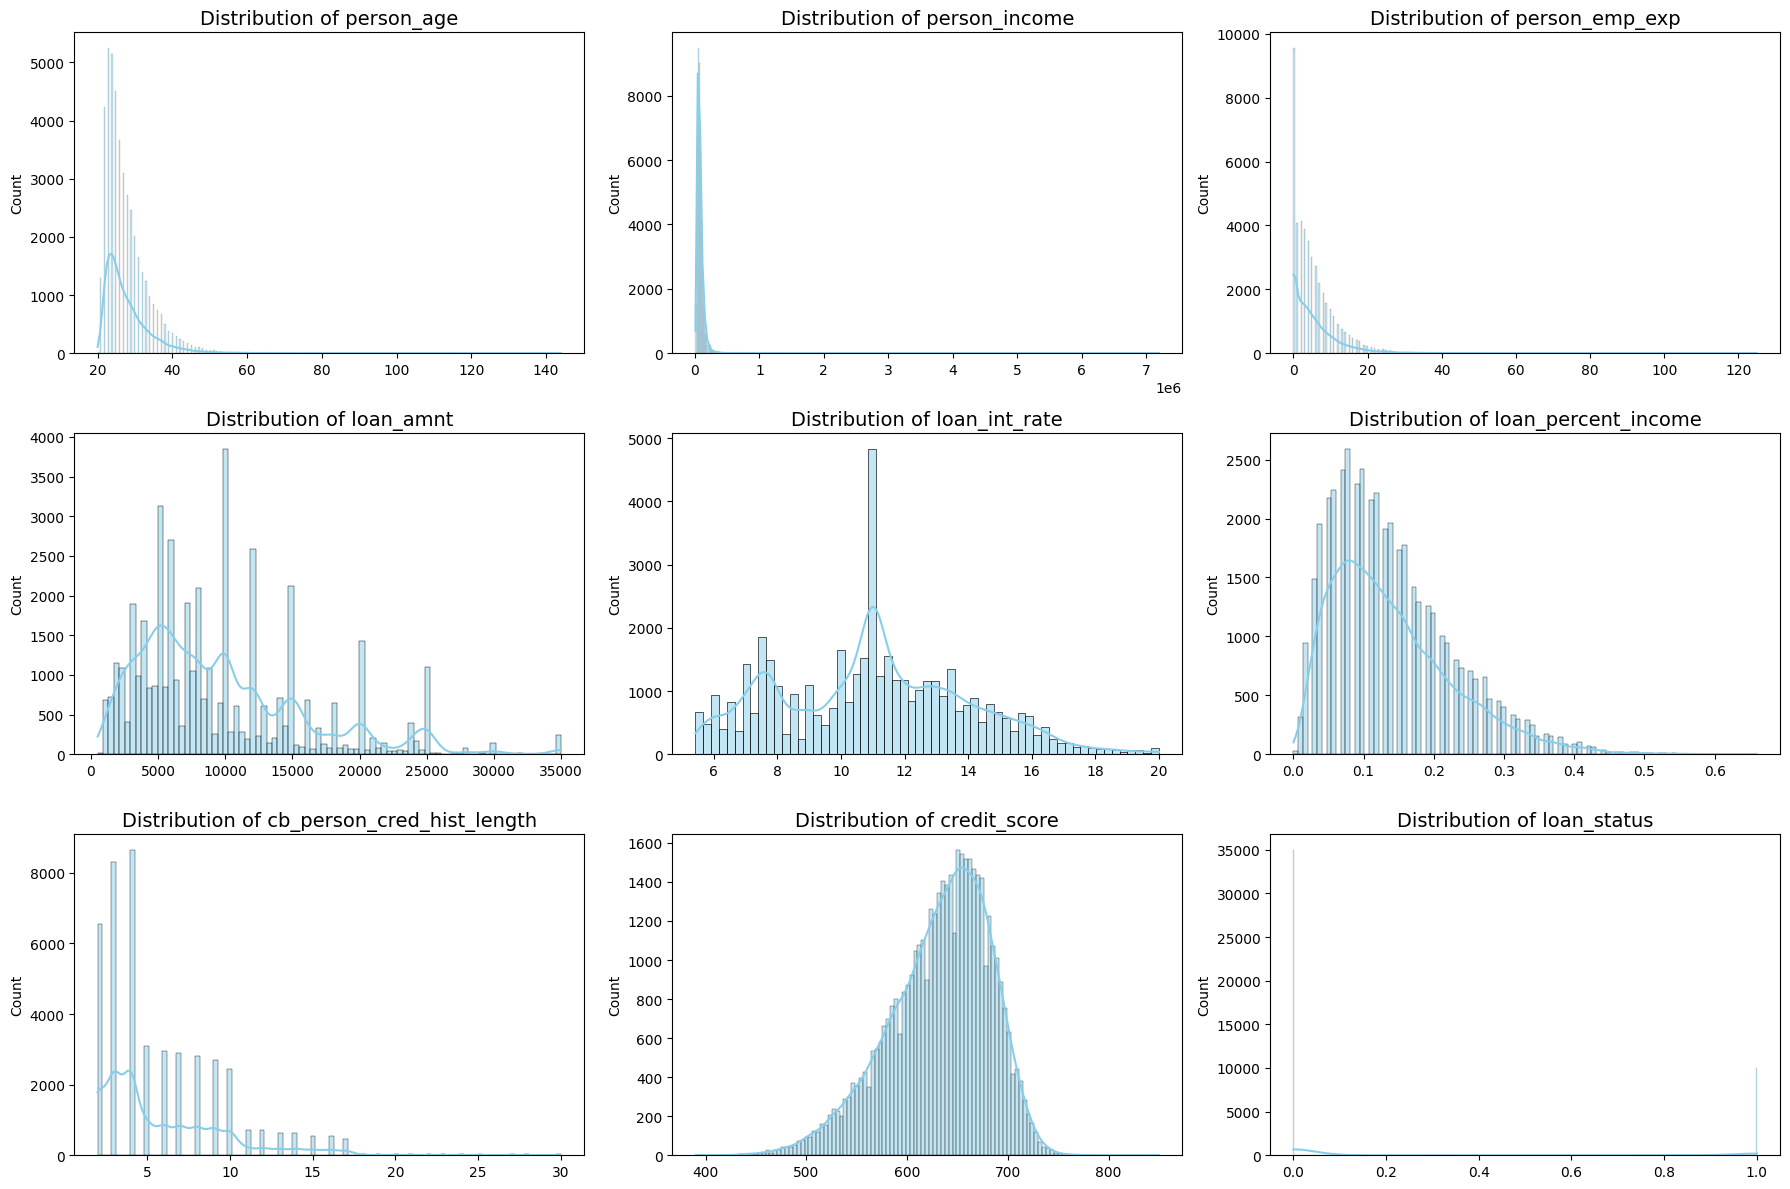

In [7]:
# Filtering out the numerical features
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Grid for display of charts (3 columns wide)
n_cols = 3
n_rows = math.ceil(len(num_cols) / n_cols)

# Defining figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten() 

# Loop through numerical columns and plot
for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel('') 

plt.tight_layout()
plt.show()

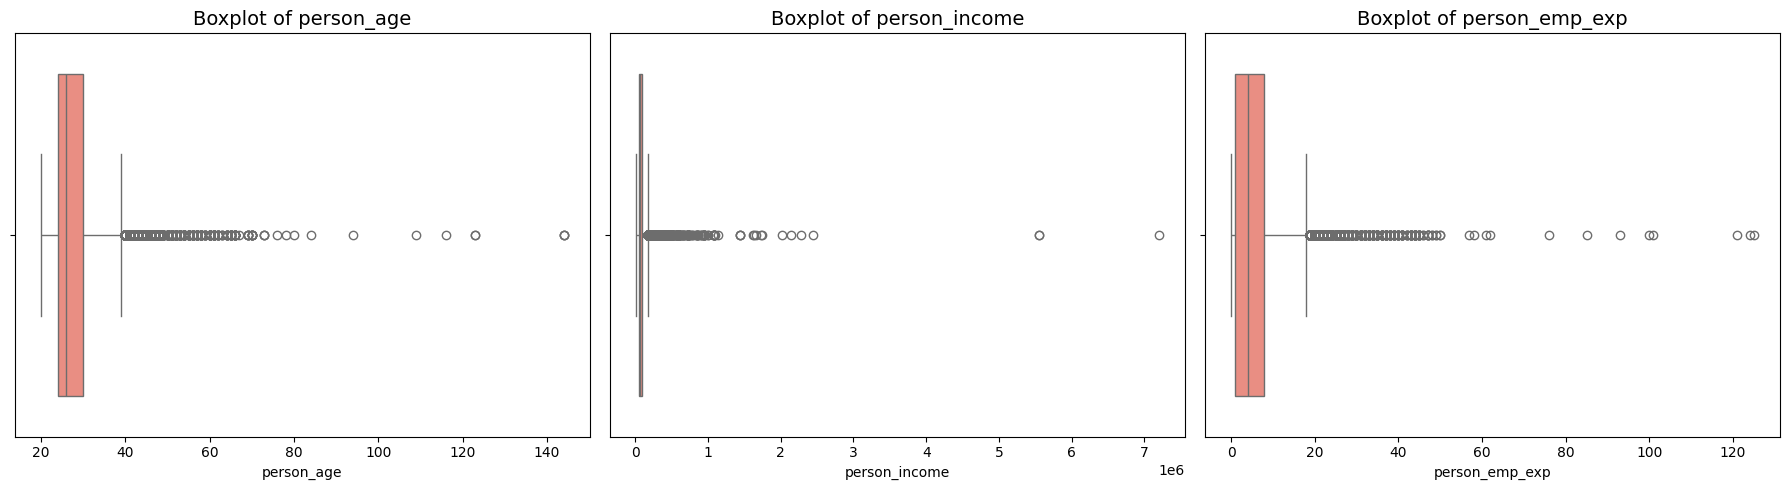

In [8]:
# columns to inspect for outliers
outlier_cols = ['person_age', 'person_income', 'person_emp_exp']
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Loop and create a boxplot for each
for i, col in enumerate(outlier_cols):
    sns.boxplot(x=df[col], ax=axes[i], color='salmon')
    axes[i].set_title(f'Boxplot of {col}', fontsize=14)
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

### 3. Preprocessing that will be used to feed the deep learning model

From the charts above, I will replace the outliers with the median for person age and person employment experience. Median is less affected by mean and will be a good approach. For person income, I will cap at the 99th percentile and replace the outliers above the cap with the median to reduce the noise. 

For the categorical features, since education level has a hierchacy, I will use ordinal encoding. For the other categorical features, I will just use one hot encoding. 

In [9]:
# Calculating the median
age_median = df['person_age'].median()
emp_exp_median = df['person_emp_exp'].median()
income_median = df['person_income'].median()

# Apply the replacement
df.loc[df['person_age'] > 100, 'person_age'] = age_median
df.loc[df['person_emp_exp'] > 60, 'person_emp_exp'] = emp_exp_median

# Calculating the 99th percentile
income_cap = df['person_income'].quantile(0.99)

# Apply the replacement
df.loc[df['person_income'] > income_cap, 'person_income'] = income_median


In [10]:
# Applying ordinal encoding on education level 
education_mapping = {
    'High School': 1,
    'Associate': 2,
    'Bachelor': 3,
    'Master': 4,
    'Doctorate': 5
}

df['person_education'] = df['person_education'].map(education_mapping).astype("float32")

In [11]:
# Apply one hot encoding
df_encoding = pd.get_dummies(df, columns=["person_gender","loan_intent","person_home_ownership","previous_loan_defaults_on_file"]).astype("float32")
df_encoding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   person_age                          45000 non-null  float32
 1   person_education                    45000 non-null  float32
 2   person_income                       45000 non-null  float32
 3   person_emp_exp                      45000 non-null  float32
 4   loan_amnt                           45000 non-null  float32
 5   loan_int_rate                       45000 non-null  float32
 6   loan_percent_income                 45000 non-null  float32
 7   cb_person_cred_hist_length          45000 non-null  float32
 8   credit_score                        45000 non-null  float32
 9   loan_status                         45000 non-null  float32
 10  person_gender_female                45000 non-null  float32
 11  person_gender_male                  45000

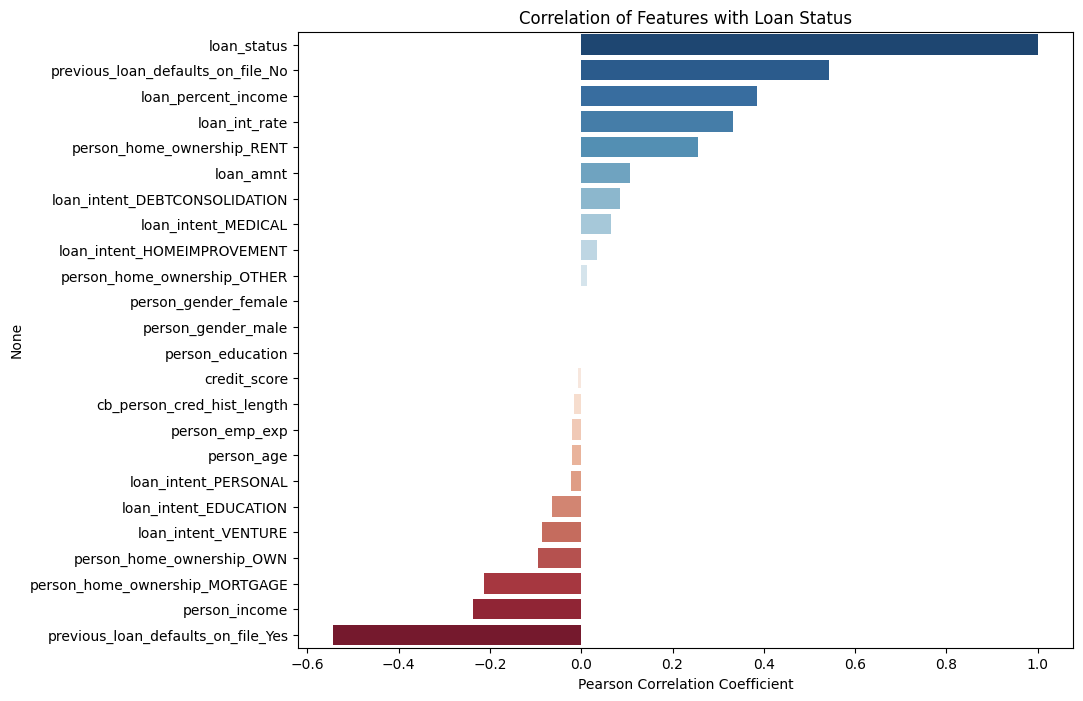

In [12]:
# Calculate correlation with target only
target_corr = df_encoding.corr()['loan_status'].sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(x=target_corr.values, y=target_corr.index, palette='RdBu_r')
plt.title('Correlation of Features with Loan Status')
plt.xlabel('Pearson Correlation Coefficient')
plt.show()

From the correlation plot, the important features seem to be:

"previous_loan_defaults_on_file", "person_income", "person_home_ownership", "loan_intent",
"loan_percent_income", "loan_int_rate", and "loan_amount" 

These features will be used for the deep learning model